In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as ct
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from pprint import pprint
from utils import *
%matplotlib inline

In [140]:
df_train = pd.read_csv('Modeles/trained_Data.csv')

In [141]:
#df_train = df_train.drop(['Unnamed: 0'],axis =1)
df_train.loc[df_train['PrixNuitee'] < 100,'classes']=0
df_train.loc[(df_train.PrixNuitee >= 100),['classes']]=1
#df_train['classes'] = (df['PrixNuitee']>100)

In [142]:
df_train['classes'] = df_train['classes'].astype('int')

In [143]:
Classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'RandomForestClassifier': RandomForestClassifier,
    'KNeighborsClassifier': KNeighborsClassifier,
    'LogisticRegression': LogisticRegression
}

In [144]:
df_train = df_train[['Type_logement','type_propriete','PrixNuitee','NbChambres','Capacite_accueil','Desc_pre','Titre_pre','Reg_pre','classes']]

In [145]:
Regressors = {
    'LinearRegression': LinearRegression,
    'XGBoostRegression': xgb.XGBRFRegressor,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'Polynomial Regression':PolynomialFeatures
}

In [146]:
def classifier(modelclassif,X_class,y_class):
    #X_class = df_train.drop(['PrixNuitee','classes'],axis=1)
    #y_class = df_train['classes']
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class,random_state=1, test_size=0.1)
    if modelclassif == 'DecisionTreeClassifier':
        clf_model = DecisionTreeClassifier(criterion="entropy", random_state=42,
                                           max_depth=5, 
                                           min_samples_leaf=0.20,
                                           splitter = 'best'
                                          )       
        clf_model.fit(X_train_class,y_train_class)
        y_predict_class = clf_model.predict(X_test_class)
    elif modelclassif == 'RandomForestClassifier':
        """
        {'n_estimators': 400,
        'min_samples_split': 10,
        'min_samples_leaf': 4,
        'max_features': 'auto',
        'max_depth': 70,
        'bootstrap': True}
        """
        clf_model = RandomForestClassifier(
            n_estimators = 400,
            min_samples_split = 10,
            min_samples_leaf = 4,
            max_features = 'auto',
            max_depth = 70,
            bootstrap = True
        )
        clf_model.fit(X_train_class,y_train_class)
        y_predict_class = clf_model.predict(X_test_class)
    elif modelclassif == 'KNeighborsClassifier':
        clf_model = KNeighborsClassifier(n_neighbors = 3)
        clf_model.fit(X_train_class,y_train_class)
        y_predict_class = clf_model.predict(X_test_class)
    elif modelclassif == 'LogisticRegression':
        clf_model = LogisticRegression()
        clf_model.fit(X_train_class,y_train_class)
        y_predict_class = clf_model.predict(X_test_class)
    acc = accuracy_score(y_test_class,y_predict_class)
    report = classification_report(y_test_class,y_predict_class) 
    Classifiers[modelclassif] = clf_model
    return clf_model,acc,report


def regressor(modelReg,X,y):
    #X_reg = df_train_1.drop(['PrixNuitee','classes','predictedClass'],axis=1)
    #y_reg = df_train_1['PrixNuitee']
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.1)
    if modelReg == 'LinearRegression':
        reg_model = LinearRegression()
        reg_model.fit(X_train,y_train)
        r2 = r2_score(reg_model.predict(X_test),y_test)
        mse = mean_squared_error(reg_model.predict(X_test),y_test)
        mae = mean_absolute_error(reg_model.predict(X_test),y_test)
    elif modelReg == 'XGBoostRegression':
        reg_model = xgb.XGBRFRegressor()
        reg_model.fit(X_train,y_train)
        r2 = r2_score(reg_model.predict(X_test),y_test)
        mse = mean_squared_error(reg_model.predict(X_test),y_test)
        mae = mean_absolute_error(reg_model.predict(X_test),y_test)
    elif modelReg == 'Ridge':
        reg_model = Ridge()
        reg_model.fit(X_train,y_train)
        r2 = r2_score(reg_model.predict(X_test),y_test)
        mse = mean_squared_error(reg_model.predict(X_test),y_test)
        mae = mean_absolute_error(reg_model.predict(X_test),y_test) 
    elif modelReg == 'Lasso':
        reg_model = Lasso()
        reg_model.fit(X_train,y_train)
        r2 = r2_score(reg_model.predict(X_test),y_test)
        mse = mean_squared_error(reg_model.predict(X_test),y_test)
        mae = mean_absolute_error(reg_model.predict(X_test),y_test) 
    elif modelReg == 'Polynomial Regression':
        reg_model = LinearRegression()
        reg_model.fit(X_train,y_train)
        r2 = r2_score(reg_model.predict(X_test),y_test)
        mse = mean_squared_error(reg_model.predict(X_test),y_test)
        mae = mean_absolute_error(reg_model.predict(X_test),y_test)
    Regressors[modelReg]=reg_model
    return reg_model, r2,mse,mae

## DecisionTreeClassifier Parameter tuning :

In [53]:
criterons = ['gini','entropy']
splitters = ['best','random']
X_class = df_train.drop(['PrixNuitee','classes'],axis=1)
y_class = df_train['classes']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class,random_state=1, test_size=0.1)

x_train = X_train_class
y_train = y_train_class
x_test = X_test_class
y_test = y_test_class

#### criterion

In [52]:
def criterionP(c):
    clf_model = DecisionTreeClassifier(criterion=c, random_state=42)
    clf_model.fit(X_train_class,y_train_class)
    return accuracy_score(clf_model.predict(X_test_class),y_test_class)

#criterionP('gini')

for c in criterons:
    print(c,' : ',criterionP(c))

gini  :  0.7938931297709924
entropy  :  0.7900763358778626


#### splitter

In [54]:
def splitterP(s):
    clf_model = DecisionTreeClassifier(splitter=s, random_state=42)
    clf_model.fit(X_train_class,y_train_class)
    return accuracy_score(clf_model.predict(X_test_class),y_test_class)

#criterionP('gini')

for s in splitters:
    print(s,' : ',splitterP(s))

best  :  0.7938931297709924
random  :  0.7919847328244275


#### max_depth

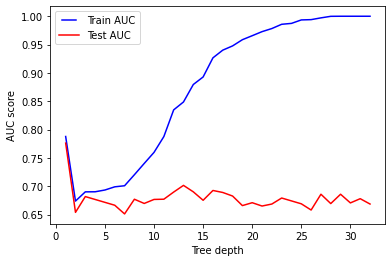

In [59]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train_class, y_train_class)
    train_pred = dt.predict(X_train_class)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_class, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_class)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_class, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#### min_samples_split:

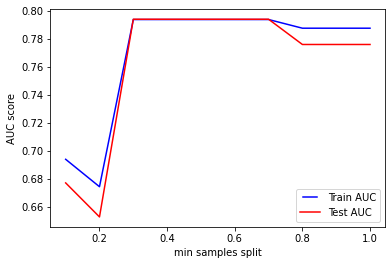

In [61]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

# Min samples -> 0.7

#### min samples leafs

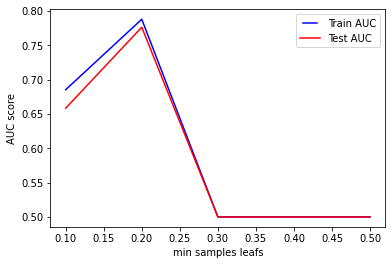

In [62]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leafs')
plt.show()

# Min samples leafs --> 0.20

## RandomForestClassifier Parameter tuning :

In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)


rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', #‘f1’
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train_class, y_train_class);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.4min finished


In [138]:
X_class

,Unnamed: 0,Type_logement,type_propriete,NbChambres,Capacite_accueil,Desc_pre,Titre_pre,Reg_pre
0,0,1,9,1,2,547.415747,1.000000,70.242437
1,1,2,0,1,2,1656.273528,2.645751,54.027771
2,2,1,9,1,2,1204.822394,3.162278,52.009614
3,3,2,0,2,4,3745.453377,0.000000,136.319478
4,4,2,0,1,4,2751.334404,4.123106,70.121323
...,...,...,...,...,...,...,...,...
5229,5232,2,0,1,4,4637.633233,36.013886,146.003425
5230,5233,1,0,1,2,6147.921275,128.432862,94.090382
5231,5234,1,0,1,3,17006.853912,104.033648,759.368158
5232,5235,2,9,1,4,5577.381016,105.792249,761.626549


In [72]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

## KNeighborsClassifier Parameter tuning :

#### n_neighbours

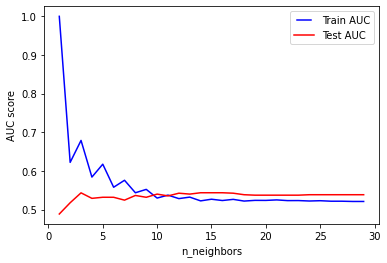

In [80]:
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


line1, = plt.plot(neighbors, train_results, 'b', label="Train AUC")
line2, = plt.plot(neighbors, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

# n_neighbours ---> 3

# Regressors :

In [84]:
X_class = df_train.drop(['PrixNuitee','classes'],axis=1)
y_class = df_train['PrixNuitee']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class,random_state=1, test_size=0.1)

x_train = X_train_class
y_train = y_train_class
x_test = X_test_class
y_test = y_test_class

## XGBoostRegression Tuning

In [175]:
params = { 'max_depth': [1,4,5,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7,0.8]}

xgbr = xgb.XGBRegressor(seed = 10)
pprint(params)

{'colsample_bytree': [0.3, 0.7, 0.8],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [1, 4, 5, 10],
 'n_estimators': [100, 500, 1000]}


In [176]:
rf_random = RandomizedSearchCV(estimator=xgbr, param_distributions=params,
                              n_iter = 100, scoring='r2', #‘f1’
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train_class, y_train_class);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 81.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 249.9min


KeyboardInterrupt: 

In [ ]:
rf_random

# Model Training

## Classifiers :

In [147]:
X_class = df_train.drop(['PrixNuitee','classes'],axis=1)
y_class = df_train['classes']

In [178]:
X_class

,Type_logement,type_propriete,NbChambres,Capacite_accueil,Desc_pre,Titre_pre,Reg_pre
0,1,9,1,2,547.415747,1.000000,70.242437
1,2,0,1,2,1656.273528,2.645751,54.027771
2,1,9,1,2,1204.822394,3.162278,52.009614
3,2,0,2,4,3745.453377,0.000000,136.319478
4,2,0,1,4,2751.334404,4.123106,70.121323
...,...,...,...,...,...,...,...
5229,2,0,1,4,4637.633233,36.013886,146.003425
5230,1,0,1,2,6147.921275,128.432862,94.090382
5231,1,0,1,3,17006.853912,104.033648,759.368158
5232,2,9,1,4,5577.381016,105.792249,761.626549


In [148]:
for model in Classifiers.keys():
    _,acc,report = classifier(model,X_class,y_class)
    print(model,' accuracy => ',acc)
    print(report)

DecisionTreeClassifier  accuracy =>  0.833969465648855
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       426
           1       0.54      0.68      0.61        98

    accuracy                           0.83       524
   macro avg       0.73      0.78      0.75       524
weighted avg       0.85      0.83      0.84       524

RandomForestClassifier  accuracy =>  0.8645038167938931
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       426
           1       0.70      0.48      0.57        98

    accuracy                           0.86       524
   macro avg       0.79      0.72      0.74       524
weighted avg       0.85      0.86      0.85       524

KNeighborsClassifier  accuracy =>  0.7748091603053435
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       426
           1       0.31      0.17      0.22        98

    accuracy     

/home/mouad/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Best Classifier :

In [149]:
## Python program to understand the usage of tabulate function for printing tables in a tabular format
from tabulate import tabulate
data = [['Accuracy']+[accuracy_score(Classifiers[key].predict(X_class),y_class) for key in Classifiers.keys()],
        ['F1']+[f1_score(Classifiers[key].predict(X_class),y_class) for key in Classifiers.keys()],
        ['Recall']+[recall_score(Classifiers[key].predict(X_class),y_class) for key in Classifiers.keys()]
       ] 
print(tabulate(data, headers=['Measure']+list(Classifiers.keys())))

Measure      DecisionTreeClassifier    RandomForestClassifier    KNeighborsClassifier    LogisticRegression
---------  ------------------------  ------------------------  ----------------------  --------------------
Accuracy                   0.823271                  0.900459                0.837982              0.831295
F1                         0.624442                  0.712314                0.485437              0.366116
Recall                     0.548111                  0.858855                0.680272              0.765766


In [180]:
import joblib

# save the model to disk
filename = 'Result/class_model.sav'
joblib.dump(Classifiers['RandomForestClassifier'], filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)

## Regressors :

### RegressorOne :

In [150]:
df_train_1 = df_train.loc[df_train['classes']== 0]

In [151]:
X_reg_1 = df_train_1.drop(['PrixNuitee','classes'],axis=1)
y_reg_1 = df_train_1['PrixNuitee']

In [152]:
for model in Regressors.keys():
    _,r2,mse,mae = regressor(model,X_reg_1,y_reg_1)
    print(model,' ------------------------------------\n',
          'r2 => ',r2,
          '\nMean Squared Error => ',mse,
          '\nMean Absolute Error => ',mae
         )

regressorOneRegister = Regressors

LinearRegression  ------------------------------------
 r2 =>  -1.0896314951299413 
Mean Squared Error =>  286.21439911886216 
Mean Absolute Error =>  13.308734555898738
XGBoostRegression  ------------------------------------
 r2 =>  -0.7841473199379532 
Mean Squared Error =>  276.13484920558153 
Mean Absolute Error =>  12.93759408978184
Ridge  ------------------------------------
 r2 =>  -1.091913298594402 
Mean Squared Error =>  286.2023085209517 
Mean Absolute Error =>  13.309329820568477
Lasso  ------------------------------------
 r2 =>  -2.0277585861780976 
Mean Squared Error =>  290.8839475060331 
Mean Absolute Error =>  13.70147321778131
Polynomial Regression  ------------------------------------
 r2 =>  -1.0896314951299413 
Mean Squared Error =>  286.21439911886216 
Mean Absolute Error =>  13.308734555898738


#### Best Regressor I

In [153]:
data = [['R2']+[r2_score(regressorOneRegister[key].predict(X_reg_1),y_reg_1) for key in regressorOneRegister.keys()],
        ['MSE']+[mean_squared_error(regressorOneRegister[key].predict(X_reg_1),y_reg_1) for key in regressorOneRegister.keys()],
        ['MAE']+[mean_absolute_error(regressorOneRegister[key].predict(X_reg_1),y_reg_1) for key in regressorOneRegister.keys()]
       ] 
print(tabulate(data, headers=['Measure']+list(regressorOneRegister.keys())))

Measure      LinearRegression    XGBoostRegression      Ridge      Lasso    Polynomial Regression
---------  ------------------  -------------------  ---------  ---------  -----------------------
R2                  -0.664963            -0.349655   -0.66694   -1.49731                -0.664963
MSE                245.415              213.913     245.414    253.849                 245.415
MAE                 12.4531              11.6332     12.4536    12.8354                 12.4531


In [181]:
import joblib

# save the model to disk
filename = 'Result/regressOne_model.sav'
joblib.dump(regressorOneRegister['XGBoostRegression'], filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)

### RegressorTwo :

In [154]:
df_train_2 = df_train.loc[df_train['classes']== 1]
X_reg_2 = df_train_2.drop(['PrixNuitee','classes'],axis=1)
y_reg_2 = df_train_2['PrixNuitee']

In [155]:
for model in Regressors.keys():
    _,r2,mse,mae = regressor(model,X_reg_2,y_reg_2)
    print(model,' ------------------------------------\n',
          'r2 => ',r2,
          '\nMean Squared Error => ',mse,
          '\nMean Absolute Error => ',mae
         )

regressorTwoRegister = Regressors

LinearRegression  ------------------------------------
 r2 =>  -2.077629148949636 
Mean Squared Error =>  8427.567690417067 
Mean Absolute Error =>  52.31301014547509
XGBoostRegression  ------------------------------------
 r2 =>  -0.19234252105246696 
Mean Squared Error =>  7065.416932234301 
Mean Absolute Error =>  52.60723747397369
Ridge  ------------------------------------
 r2 =>  -2.09602616573797 
Mean Squared Error =>  8438.8793151152 
Mean Absolute Error =>  52.307518872797175
Lasso  ------------------------------------
 r2 =>  -2.561410922667501 
Mean Squared Error =>  8750.610776040523 
Mean Absolute Error =>  52.52713463270967
Polynomial Regression  ------------------------------------
 r2 =>  -2.077629148949636 
Mean Squared Error =>  8427.567690417067 
Mean Absolute Error =>  52.31301014547509


#### Best Regressor II

In [156]:
data = [['R2']+[r2_score(regressorTwoRegister[key].predict(X_reg_1),y_reg_1) for key in regressorTwoRegister.keys()],
        ['MSE']+[mean_squared_error(regressorTwoRegister[key].predict(X_reg_1),y_reg_1) for key in regressorTwoRegister.keys()],
        ['MAE']+[mean_absolute_error(regressorTwoRegister[key].predict(X_reg_1),y_reg_1) for key in regressorTwoRegister.keys()]
       ] 
print(tabulate(data, headers=['Measure']+list(regressorTwoRegister.keys())))

Measure      LinearRegression    XGBoostRegression       Ridge       Lasso    Polynomial Regression
---------  ------------------  -------------------  ----------  ----------  -----------------------
R2                   -6.82641             -20.9524    -6.96151    -9.92741                 -6.82641
MSE                6557.12               8132.25    6503.97     5689.37                  6557.12
MAE                  73.0202               85.4656    72.8571     70.3319                  73.0202


## Model Predicting:

In [170]:
def predict(X):
    #------------------------------------- Classifier
    clf_model = Classifiers['RandomForestClassifier']#BEST CLASSIFIER
    classes = clf_model.predict(X.drop(['PrixNuitee','classes'],axis=1))
    X['classes']=classes
    #------------------------------------- Regressor I
    X_1 = X.loc[X['classes']== 0]
    y_1 = X_1['PrixNuitee'].values
    reg_modelI = regressorOneRegister['XGBoostRegression']#BEST REGRESOR|ONE
    prixNuitee_1 = reg_modelI.predict(X_1.drop(['PrixNuitee','classes'],axis=1))
    #------------------------------------- Regressor II
    X_2 = X.loc[X['classes']== 1]
    reg_modelII = regressorTwoRegister['XGBoostRegression']#BEST REGRESSOR|TWO
    y_2 = X_2['PrixNuitee'].values
    prixNuitee_2 = reg_modelII.predict(X_2.drop(['PrixNuitee','classes'],axis=1))
    return prixNuitee_1,y_1,prixNuitee_2,y_2

def predict_Adv(X):
    #[['Longitude','Latitude','type_propriete','PrixNuitee',
    #'NbChambres','Capacite_accueil','Desc_pre','Titre_pre','Reg_pre']]
    #------------------------------------- Classifier
    clf_model = Classifiers['RandomForestClassifier']#BEST CLASSIFIER
    classes = clf_model.predict(X.drop(['latitude','longitude']))
    X['classes']=classes
    #------------------------------------- Regressor I
    X_1 = X.loc[X['classes']== 0]
    reg_modelI = regressorOneRegister['XGBoostRegression']#BEST REGRESOR|ONE
    prixNuitee_1 = reg_modelI.predict(X_1.drop(['latitude','longitude'],axis=1))
    result_1 = pd.DataFrame(data = {
        'latitude': X_1['latitude'].values,
        'longitude':X_1['longitude'].values,
        'PrixNuitee':prixNuitee_1
    }
    )
    #------------------------------------- Regressor II
    X_2 = X.loc[X['classes']== 1]
    reg_modelII = regressorTwoRegister['XGBoostRegression']#BEST REGRESSOR|TWO
    prixNuitee_2 = reg_modelII.predict(X_2.drop(['latitude','longitude'],axis=1))
    result_2 = pd.DataFrame( data = {
        'latitude':X_2['latitude'].values,
        'longitude':X_2['longitude'].values,
        'PrixNuitee':prixNuitee_2}
    )
    #------------------------------------- File Json
    result = pd.concat([result_1, result_2], ignore_index=True)
    result.to_json('predict.json',orient='records')
    return result #prixNuitee_1,prixNuitee_2


In [182]:
import joblib

# save the model to disk
filename = 'Result/regressTwo_model.sav'
joblib.dump(regressorTwoRegister['XGBoostRegression'], filename)

# some time later...

# load the model from disk
loaded_model = joblib.load(filename)

In [171]:
prixNuitee_1,y_1,prixNuitee_2,y_2 = predict(df_train)

In [183]:
df_train

,Type_logement,type_propriete,PrixNuitee,NbChambres,Capacite_accueil,Desc_pre,Titre_pre,Reg_pre,classes
0,1,9,25,1,2,547.415747,1.000000,70.242437,0
1,2,0,71,1,2,1656.273528,2.645751,54.027771,0
2,1,9,75,1,2,1204.822394,3.162278,52.009614,0
3,2,0,155,2,4,3745.453377,0.000000,136.319478,0
4,2,0,80,1,4,2751.334404,4.123106,70.121323,0
...,...,...,...,...,...,...,...,...,...
5229,2,0,60,1,4,4637.633233,36.013886,146.003425,0
5230,1,0,50,1,2,6147.921275,128.432862,94.090382,0
5231,1,0,20,1,3,17006.853912,104.033648,759.368158,0
5232,2,9,70,1,4,5577.381016,105.792249,761.626549,0


In [172]:
prixNuitee = list(prixNuitee_1)+list(prixNuitee_2)
y_ = list(y_1)+list(y_2)

In [174]:
fig = px.scatter(x=prixNuitee, y=y_, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=prixNuitee_2.min(), y0=prixNuitee_2.min(),
    x1=prixNuitee_2.max(), y1=prixNuitee_2.max()
)
fig.show()

In [ ]:
predict_Adv()

In [184]:
df_train

,Type_logement,type_propriete,PrixNuitee,NbChambres,Capacite_accueil,Desc_pre,Titre_pre,Reg_pre,classes
0,1,9,25,1,2,547.415747,1.000000,70.242437,0
1,2,0,71,1,2,1656.273528,2.645751,54.027771,0
2,1,9,75,1,2,1204.822394,3.162278,52.009614,0
3,2,0,155,2,4,3745.453377,0.000000,136.319478,0
4,2,0,80,1,4,2751.334404,4.123106,70.121323,0
...,...,...,...,...,...,...,...,...,...
5229,2,0,60,1,4,4637.633233,36.013886,146.003425,0
5230,1,0,50,1,2,6147.921275,128.432862,94.090382,0
5231,1,0,20,1,3,17006.853912,104.033648,759.368158,0
5232,2,9,70,1,4,5577.381016,105.792249,761.626549,0
